**SOFT COMPUTING**

**Assignment :**

to study and implement Ensemble Learning Algorithms and Comparative analysis

**Research Paper :**
Machine Learning Approaches for Classification and Diameter Prediction of Asteroids.



January 2023

DOI: 10.1007/978-981-19-7528-8_4

In book: Proceedings of International Conference on Information and Communication Technology for Development

Lab: Mir Sakhawat Hossain's Lab

Mir Sakhawat HossainMir Sakhawat HossainMd. Akib Zabed

from Research Gate

**Name :**

Omkar Awari 202101070094

Sanika Thakare 202101070120

Ayush Gohatre 202101070110

Charu Vaidya 202101070081

## **1.Drive Mount**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **2.Research Paper**

https://drive.google.com/file/d/1-yg1o9KTrMjjUnMeiLj9a4FZK9K8xH7I/view?usp=sharing



The research paper focuses on utilizing machine learning approaches for the classification and diameter prediction of asteroids, which has become crucial due to the increasing complexity of data in astronomy.

 By employing various machine learning algorithms like **kNN, Logistic Regression, and XGBoost for classification, and Linear Regression, Decision Trees, and Neural Networks** for diameter prediction, the authors achieved a high accuracy rate of **99.99%**

  The document discusses the dataset used, preprocessing steps, feature analysis techniques, and reviews related works in the field. The methodology outlined includes detailed steps for classification and diameter prediction models.
  
   Key contributions include feature analysis, efficient asteroid classification, and diameter prediction using machine learning algorithms.

The paper also reviews previous works in the field of astronomy and asteroid classification, highlighting the lack of a diameter prediction model for asteroids.

The authors propose a model to classify 13 asteroid groups and predict asteroid diameters efficiently using machine learning regression algorithms.

The results show that the **XGBoost model outperformed other machine learning regression models in accuracy and performance for asteroid classification.**

Evaluation metrics such as mean squared error, mean absolute error, and root mean square error were used for diameter prediction models, showcasing the effectiveness of the applied models.

In conclusion, the paper provides a comprehensive analysis of the methodology, results, and future research directions in the field of asteroid classification and diameter prediction using machine learning approaches .

## **3.Reading Dataset**

https://drive.google.com/file/d/1-W0DyfLbgxjMsjhAAFsmHaVIGjoq9Ucg/view?usp=sharing

NASA JPL Asteroid Dataset

  collected this Dataset from kaggle  which is officially maintained by Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA.
  
   In this Dataset all kinds of Data related to Asteroid is included.
   
  This Dataset is publicly available in their website.

  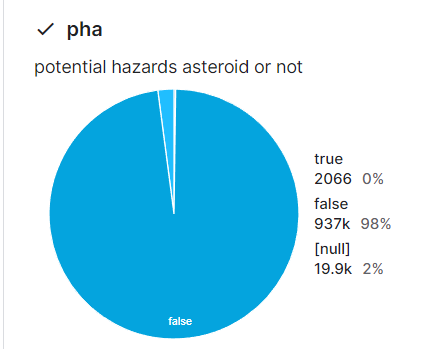

  

unique values in the Dataset : 958524

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DataSets/asteroid.csv")
df.head()

<ipython-input-3-e50590ac38c8>:5: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/DataSets/asteroid.csv")


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
df.shape

(958524, 45)

In [5]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [7]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [8]:
df.isnull().sum() / len(df) * 100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

## **4.Data Cleaning**

In [9]:
df = df.drop(['name', 'prefix'], axis=1)

In [10]:
df[df['pha'] == 'Y'].isnull().sum()

id                   0
spkid                0
full_name            0
pdes                 0
neo                  0
pha                  0
H                    0
diameter          1845
albedo            1866
diameter_sigma    1877
orbit_id             0
epoch                0
epoch_mjd            0
epoch_cal            0
equinox              0
e                    0
a                    0
q                    0
i                    0
om                   0
w                    0
ma                   0
ad                   0
n                    0
tp                   0
tp_cal               0
per                  0
per_y                0
moid                 0
moid_ld              0
sigma_e              0
sigma_a              0
sigma_q              0
sigma_i              0
sigma_om             0
sigma_w              0
sigma_ma             0
sigma_ad             0
sigma_n              0
sigma_tp             0
sigma_per            0
class                0
rms                  0
dtype: int6

In [11]:
df = df.dropna()

In [12]:
df

,id,spkid,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,939.400,0.0900,0.200,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,545.000,0.1010,18.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,246.596,0.2140,10.594,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,525.400,0.4228,0.200,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,106.699,0.2740,3.140,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,bK16N07B,3755231,(2016 NB7),2016 NB7,N,N,16.20,3.793,0.0210,1.375,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,bK16N24W,3755298,(2016 NW24),2016 NW24,N,N,17.40,2.696,0.0610,0.701,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,bK16P66B,3757444,(2016 PB66),2016 PB66,N,N,17.20,3.271,0.0720,1.074,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,bK16TB9F,54000016,(2016 TF119),2016 TF119,N,N,16.00,3.009,0.0780,0.981,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


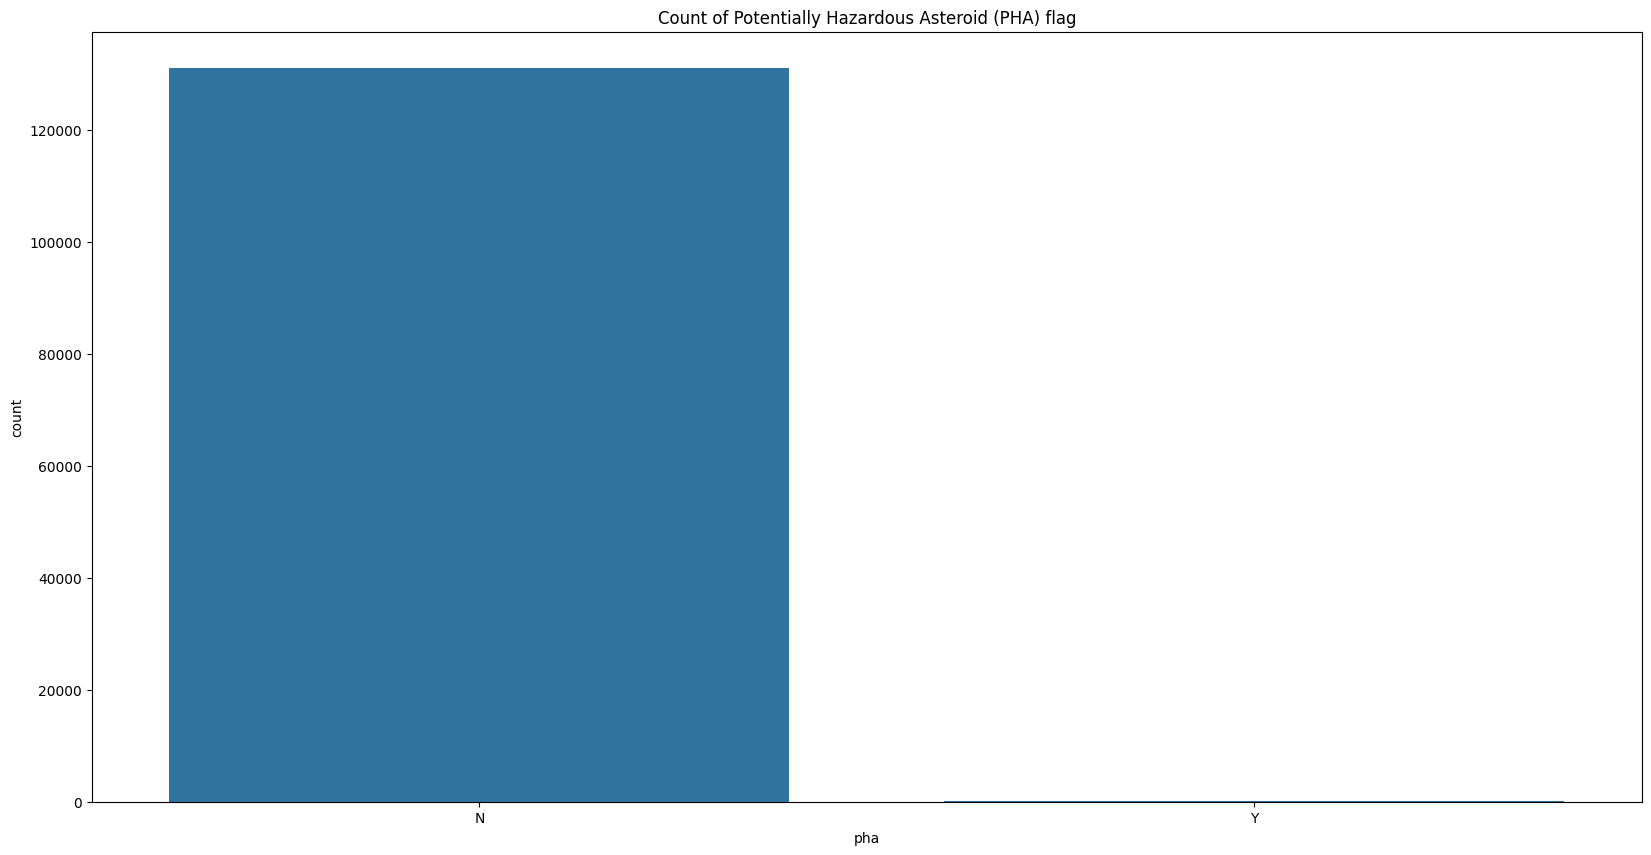

In [13]:
plt.figure(figsize=(20,10))
plt.title('Count of Potentially Hazardous Asteroid (PHA) flag')
sns.countplot(data=df, x='pha');

In [14]:
len(df[df['pha'] == 'N'])

130961

In [15]:
len(df[df['pha'] == 'Y'])

181

In [16]:
len(df[df['pha'] == 'Y'])/ len(df[df['pha'] == 'N']) * 100

0.13820908514748667

In [17]:
df['equinox'].unique()

array(['J2000'], dtype=object)

we will drop following columns

id

spkid

orbit_id

full_name

equinox

In [18]:
df = df.drop(['id', 'spkid','full_name', 'equinox','orbit_id','pdes'], axis=1)

In [19]:
df

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,N,N,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,N,N,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,N,N,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,N,N,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


## **5.Heatmap**

In [20]:
df['class'].unique()


array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'APO', 'ATE', 'CEN',
       'AST', 'TNO'], dtype=object)

In [21]:
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})

<Axes: >

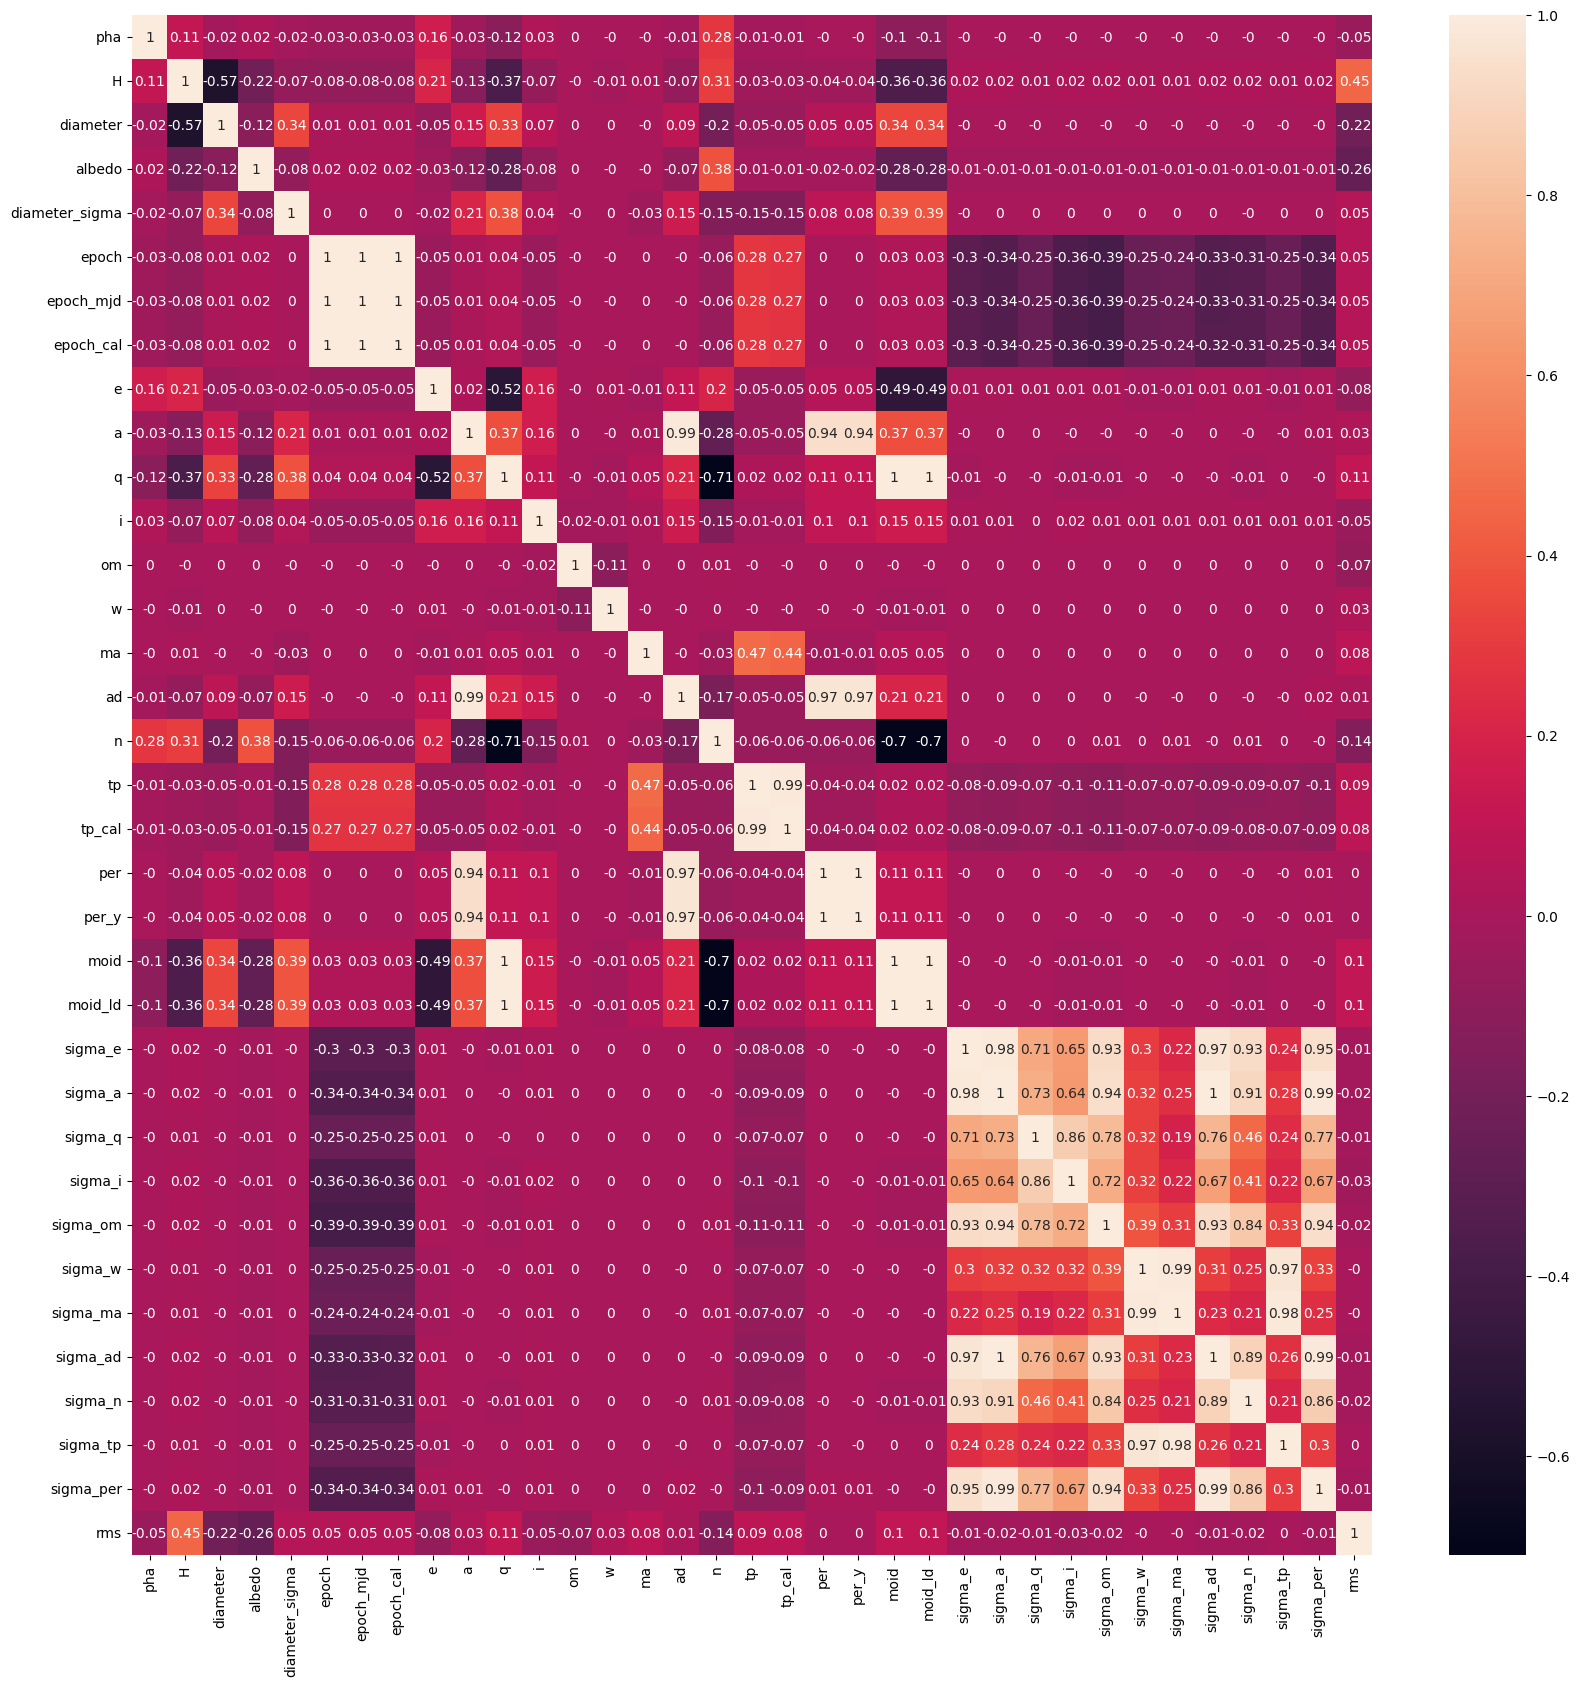

In [22]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Plot the heatmap with the numeric DataFrame
plt.figure(figsize=(20, 20))
sns.heatmap(data=round(df_numeric.corr(), 2), annot=True)


## **6.Encoding**

In [23]:
df= pd.get_dummies(df)
df

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,...,False,False,False,False,False,True,False,False,False,False
1,0,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,...,False,False,False,False,False,True,False,False,False,False
2,0,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,...,False,False,False,False,False,True,False,False,False,False
3,0,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,...,False,False,False,False,False,True,False,False,False,False
4,0,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,0,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,3.169936,...,False,False,False,False,False,True,False,False,False,False
891841,0,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,2.550597,...,False,False,False,False,False,True,False,False,False,False
894103,0,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,3.050244,...,False,False,False,False,False,True,False,False,False,False
901055,0,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,3.191395,...,False,False,False,False,False,True,False,False,False,False




## **7.Splitting the Dataset**

In [24]:
X = df.drop('pha', axis=1)
y = df['pha']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape


(91799, 47)

In [28]:
X_test.shape


(39343, 47)

In [29]:
y_train.shape


(91799,)

In [30]:
y_test.shape

(39343,)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **8.Feature Selection**

In [32]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Record the start time
start_time = time.time()

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Build the decision tree using the best hyperparameters
best_dt_classifier = grid_search.best_estimator_

print("Training time: {:.2f} seconds".format(training_time))


Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 429.78 seconds


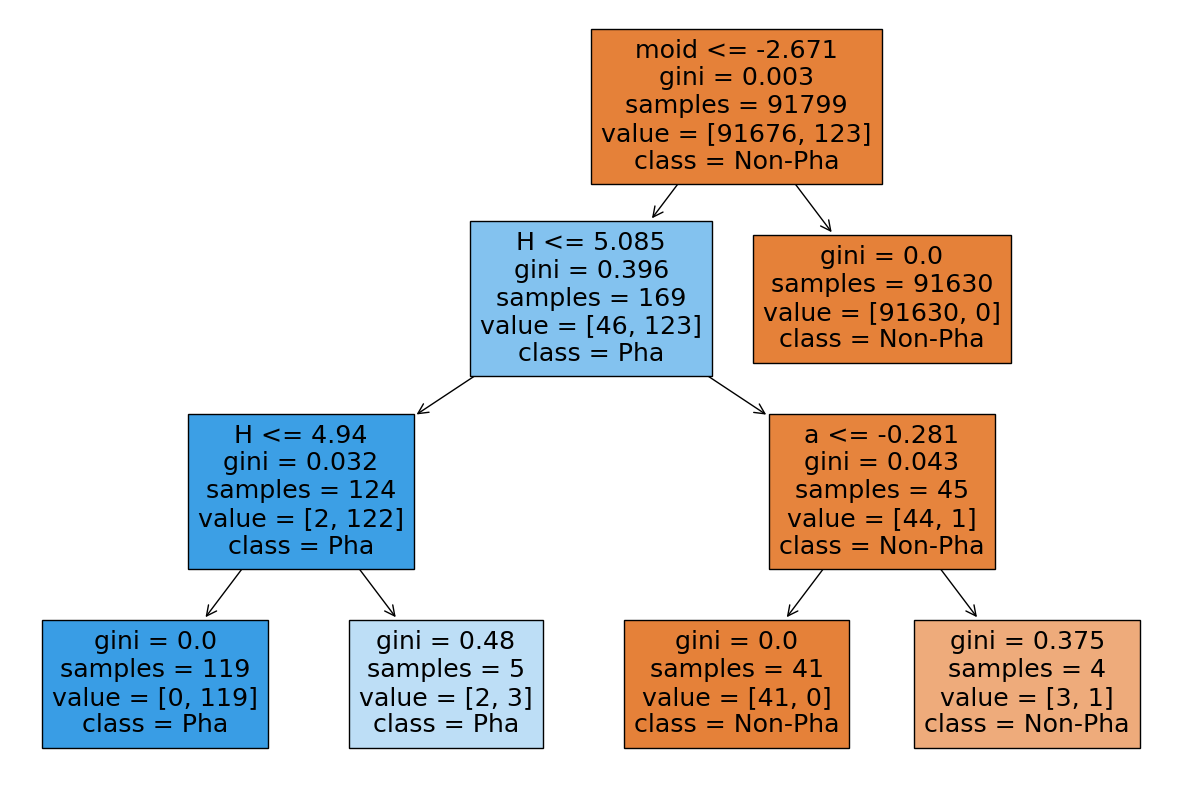

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree with the best parameters
plt.figure(figsize=(15, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['Non-Pha', 'Pha'])
plt.show()


In [34]:
# Get feature importances
feature_importances = best_dt_classifier.feature_importances_

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print("{}: {:.4f}".format(feature, importance))


Feature Importance:
moid: 0.7392
H: 0.2589
a: 0.0019
diameter: 0.0000
albedo: 0.0000
diameter_sigma: 0.0000
epoch: 0.0000
epoch_mjd: 0.0000
epoch_cal: 0.0000
e: 0.0000
q: 0.0000
i: 0.0000
om: 0.0000
w: 0.0000
ma: 0.0000
ad: 0.0000
n: 0.0000
tp: 0.0000
tp_cal: 0.0000
per: 0.0000
per_y: 0.0000
moid_ld: 0.0000
sigma_e: 0.0000
sigma_a: 0.0000
sigma_q: 0.0000
sigma_i: 0.0000
sigma_om: 0.0000
sigma_w: 0.0000
sigma_ma: 0.0000
sigma_ad: 0.0000
sigma_n: 0.0000
sigma_tp: 0.0000
sigma_per: 0.0000
rms: 0.0000
neo_N: 0.0000
neo_Y: 0.0000
class_AMO: 0.0000
class_APO: 0.0000
class_AST: 0.0000
class_ATE: 0.0000
class_CEN: 0.0000
class_IMB: 0.0000
class_MBA: 0.0000
class_MCA: 0.0000
class_OMB: 0.0000
class_TJN: 0.0000
class_TNO: 0.0000


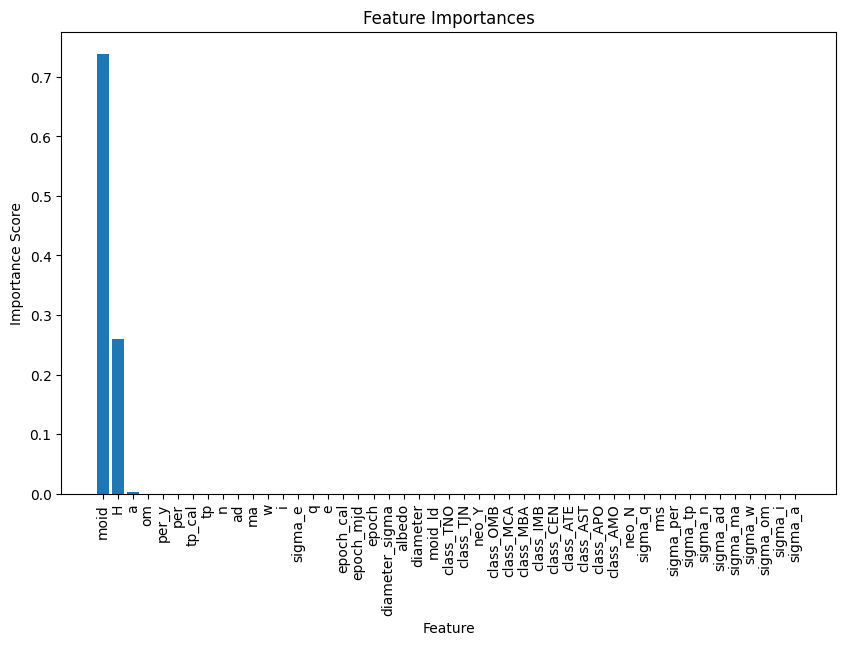

In [35]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_dt_classifier.feature_importances_

# Create a list of feature names
features = X.columns

# Sort feature importances and feature names in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), sorted_importances, align='center')
plt.xticks(range(len(features)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()


In [36]:
# Set a threshold for feature importance
threshold = 0.01  # Adjust this threshold as needed

# Get feature importances
feature_importances = best_dt_classifier.feature_importances_

# Create a mask to identify features with importance below the threshold
mask = feature_importances > threshold

# Get the names of features to keep
features_to_keep = X.columns[mask]

# Filter the dataset to keep only the selected features
X_filtered = X[features_to_keep]

# Proceed with the remaining code for splitting and scaling the filtered data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)


Size of X_train: (91799, 2)
Size of X_test: (39343, 2)
Size of y_train: (91799,)
Size of y_test: (39343,)


## **9.Models Training along with time and score**

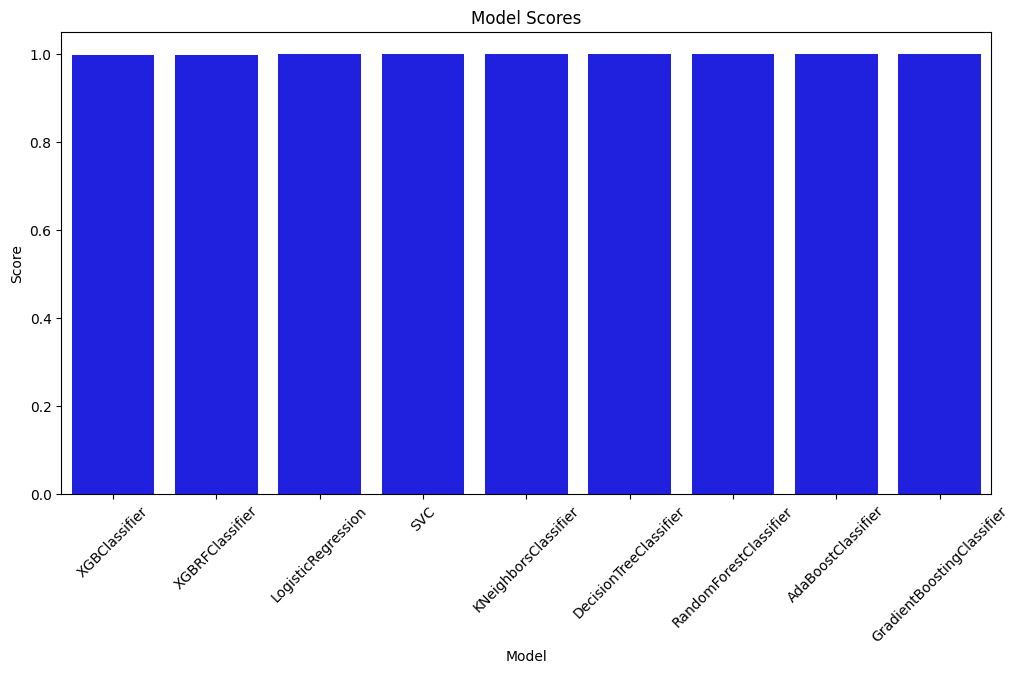

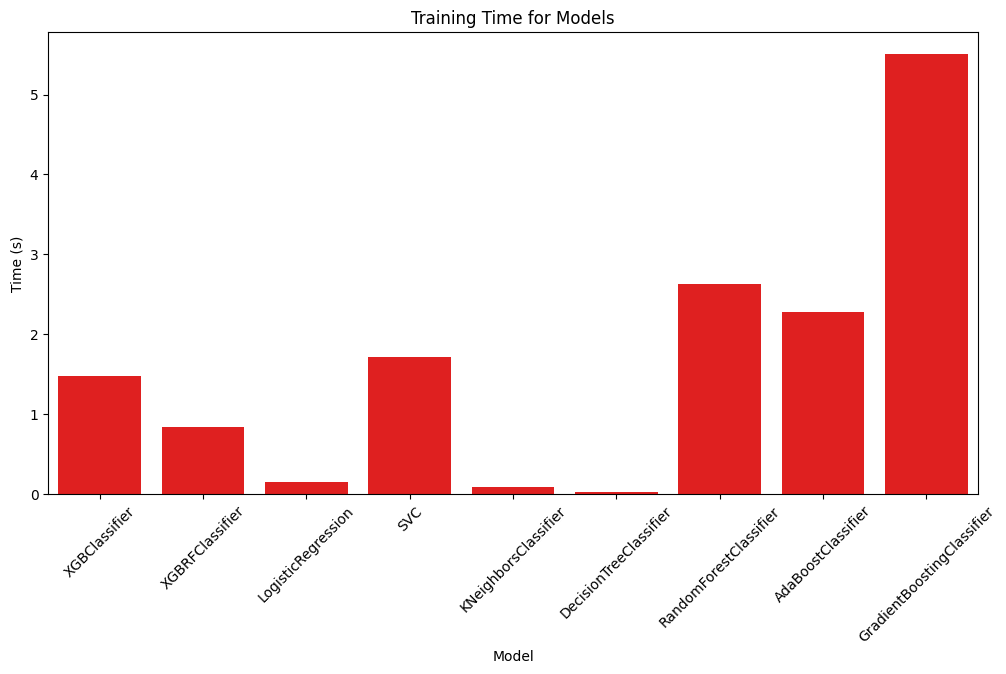

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import time

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}
    model_times = {}

    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        model_times[name] = end_time - start_time
        model_scores[name] = model.score(X_test, y_test)

    model_scores_df = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores_df = model_scores_df.sort_values('Score')

    model_times_df = pd.DataFrame(model_times, index=['Time (s)']).transpose()
    model_times_df = model_times_df.reindex(model_scores_df.index)  # Reindex to match the order of model_scores_df

    # Plotting scores
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_scores_df.index, y=model_scores_df['Score'], color='blue')
    plt.title('Model Scores')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting training times
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_times_df.index, y=model_times_df['Time (s)'], color='red')
    plt.title('Training Time for Models')
    plt.xlabel('Model')
    plt.ylabel('Time (s)')
    plt.xticks(rotation=45)
    plt.show()

    # Combine scores and times into one DataFrame
    combined_df = pd.concat([model_scores_df, model_times_df], axis=1)

    return combined_df

models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'XGBRFClassifier': XGBRFClassifier()
}

baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)


## **10.Ensemble Learning Model Evaluation**

### **1.Adaboost**

In [39]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

Classification Report

In [40]:
from sklearn.metrics import classification_report

# Assuming you have true labels 'y_true' and predicted labels 'y_pred'
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.98      1.00      0.99        58

    accuracy                           1.00     39343
   macro avg       0.99      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



Confusion Matrix

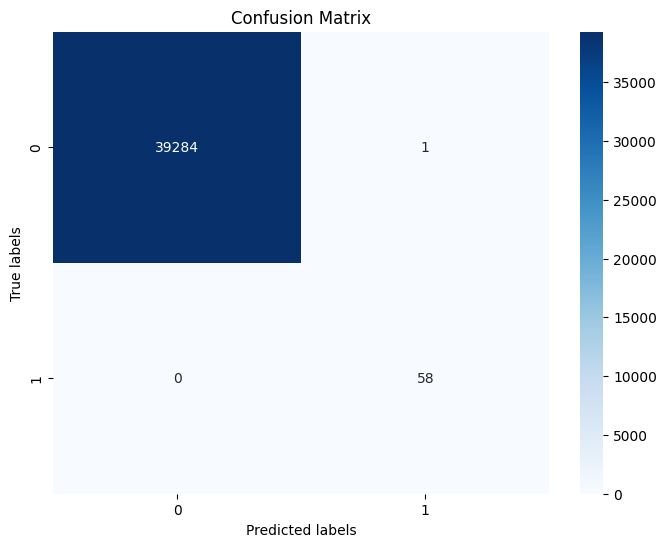

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have true labels 'y_test' and predicted labels 'y_preds'
cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Auc-Roc Curve

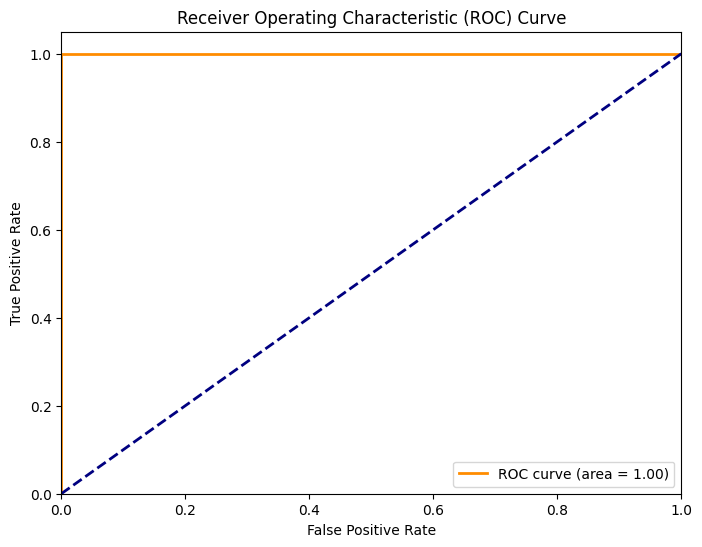

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the AdaBoostClassifier model named 'model' and the test features 'X_test'
y_preds_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


calculate evalution metrices using cross-validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cv_acc = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
cv_acc

array([1.        , 1.        , 1.        , 0.99984749, 0.99763611])

In [45]:
cv_acc = cv_acc.mean()

In [46]:
cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
cv_precision

array([1.        , 1.        , 1.        , 1.        , 0.36734694])

In [47]:
cv_precision.mean()

0.8734693877551021

In [48]:
cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
cv_recall

array([1.        , 1.        , 1.        , 0.88888889, 1.        ])

In [49]:
cv_recall.mean()

0.9777777777777779

In [50]:
cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
cv_f1

array([1.        , 1.        , 1.        , 0.94117647, 0.53731343])

In [51]:
cv_f1.mean()

0.8956979806848112

Text(0.5, 1.0, 'CV scores')

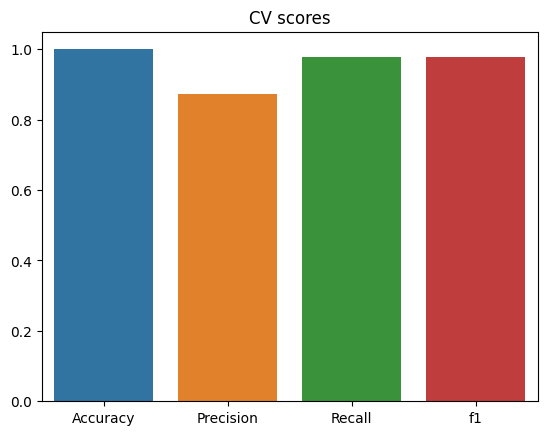

In [52]:
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')

In [53]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.999497,0.873469,0.977778,0.977778


Feature Importance

### **2.XGBClassifier**

In [54]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

Classification Report

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.25      0.03      0.06        58

    accuracy                           1.00     39343
   macro avg       0.62      0.52      0.53     39343
weighted avg       1.00      1.00      1.00     39343



Confusion Matrix

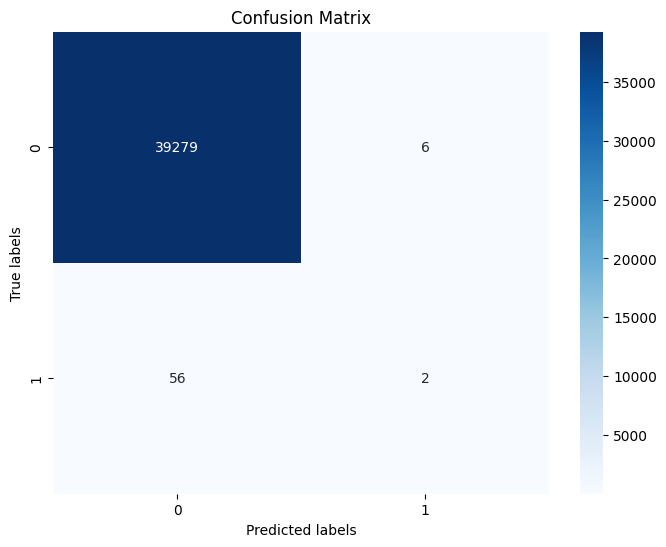

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Roc Curve

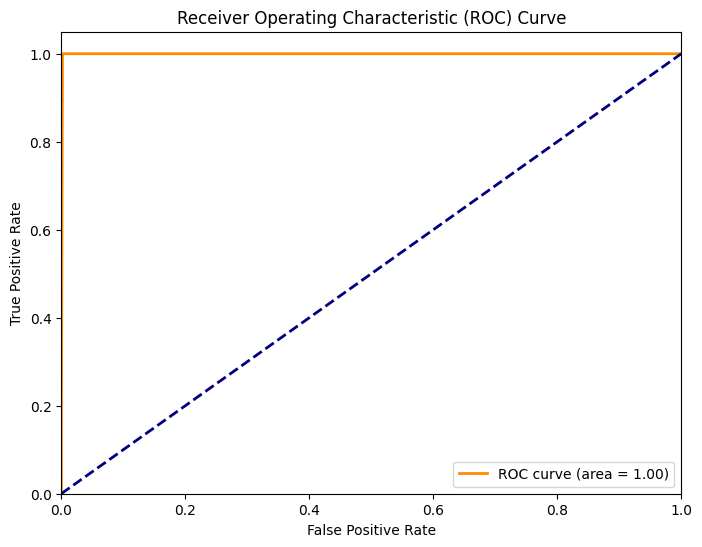

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the XGBClassifier model named 'model' and the test features 'X_test'
y_preds_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Calculate Evaluation metrics using Cross Validation

Text(0.5, 1.0, 'CV scores')

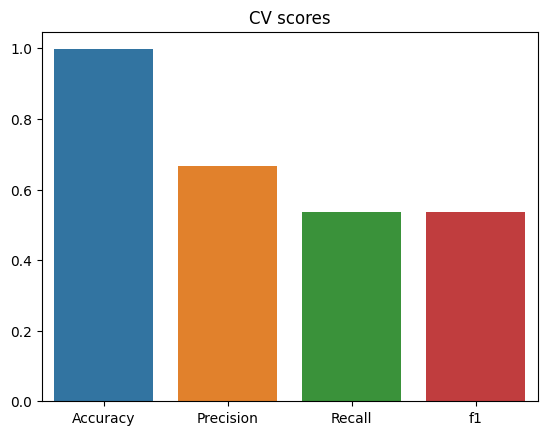

In [58]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
cv_acc
cv_acc = cv_acc.mean()
cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
cv_precision
cv_precision.mean()
cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
cv_recall
cv_recall.mean()
cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
cv_f1
cv_f1.mean()
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')

In [59]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.997331,0.667608,0.535886,0.535886


In [60]:
import time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize XGBClassifier
xgb_classifier = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Record the start time
start_time = time.time()

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)
print("Training time: {:.2f} seconds".format(training_time))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Training time: 85.47 seconds


### **3.GradientBoostingClassifier**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the GradientBoostingClassifier model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions
y_preds = model.predict(X_test)
y_preds_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class


Classification Report

In [62]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.98      1.00      0.99        58

    accuracy                           1.00     39343
   macro avg       0.99      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



Confusion Matrix

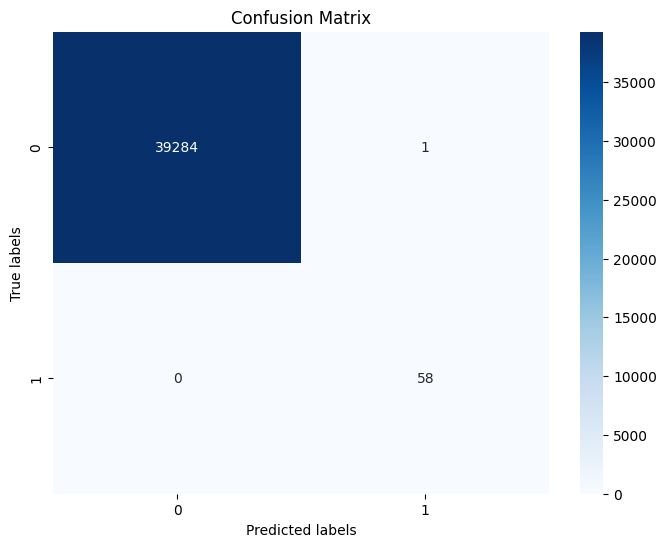

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Roc Curve

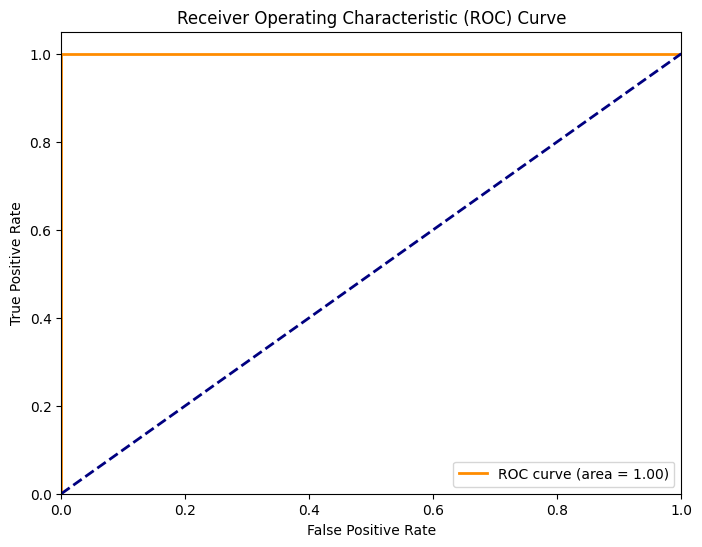

In [64]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [65]:
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Record the start time
start_time = time.time()

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Training time: 620.46 seconds
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.98      1.00      0.99        58

    accuracy                           1.00     39343
   macro avg       0.99      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



### **4.Cat-Boost**

In [66]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


In [67]:
from catboost import CatBoostClassifier

# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier()

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_preds_catboost = catboost_model.predict(X_test)


Learning rate set to 0.070969
0:	learn: 0.4413139	total: 154ms	remaining: 2m 33s
1:	learn: 0.2680341	total: 247ms	remaining: 2m 3s
2:	learn: 0.1675546	total: 302ms	remaining: 1m 40s
3:	learn: 0.1062522	total: 394ms	remaining: 1m 38s
4:	learn: 0.0637635	total: 484ms	remaining: 1m 36s
5:	learn: 0.0399368	total: 577ms	remaining: 1m 35s
6:	learn: 0.0262455	total: 660ms	remaining: 1m 33s
7:	learn: 0.0174418	total: 754ms	remaining: 1m 33s
8:	learn: 0.0119475	total: 821ms	remaining: 1m 30s
9:	learn: 0.0085649	total: 901ms	remaining: 1m 29s
10:	learn: 0.0066175	total: 976ms	remaining: 1m 27s
11:	learn: 0.0053004	total: 1.05s	remaining: 1m 26s
12:	learn: 0.0043193	total: 1.11s	remaining: 1m 24s
13:	learn: 0.0036928	total: 1.16s	remaining: 1m 21s
14:	learn: 0.0032602	total: 1.21s	remaining: 1m 19s
15:	learn: 0.0029840	total: 1.31s	remaining: 1m 20s
16:	learn: 0.0027882	total: 1.42s	remaining: 1m 21s
17:	learn: 0.0026473	total: 1.5s	remaining: 1m 21s
18:	learn: 0.0025375	total: 1.6s	remaining: 1m

0:	learn: 0.6831857	total: 9.34ms	remaining: 924ms
1:	learn: 0.6734668	total: 17.3ms	remaining: 847ms
2:	learn: 0.6640630	total: 24.2ms	remaining: 783ms
3:	learn: 0.6545993	total: 31ms	remaining: 745ms
4:	learn: 0.6454950	total: 37.9ms	remaining: 719ms
5:	learn: 0.6364822	total: 44.6ms	remaining: 699ms
6:	learn: 0.6277179	total: 51.2ms	remaining: 680ms
7:	learn: 0.6190173	total: 58.2ms	remaining: 669ms
8:	learn: 0.6106316	total: 65ms	remaining: 657ms
9:	learn: 0.6022923	total: 71.7ms	remaining: 645ms
10:	learn: 0.5941274	total: 78.8ms	remaining: 638ms
11:	learn: 0.5860568	total: 85.1ms	remaining: 624ms
12:	learn: 0.5781967	total: 92.1ms	remaining: 616ms
13:	learn: 0.5704516	total: 99.3ms	remaining: 610ms
14:	learn: 0.5628713	total: 106ms	remaining: 601ms
15:	learn: 0.5553750	total: 113ms	remaining: 592ms
16:	learn: 0.5480522	total: 120ms	remaining: 585ms
17:	learn: 0.5408296	total: 127ms	remaining: 577ms
18:	learn: 0.5337961	total: 133ms	remaining: 567ms
19:	learn: 0.5267799	total: 140

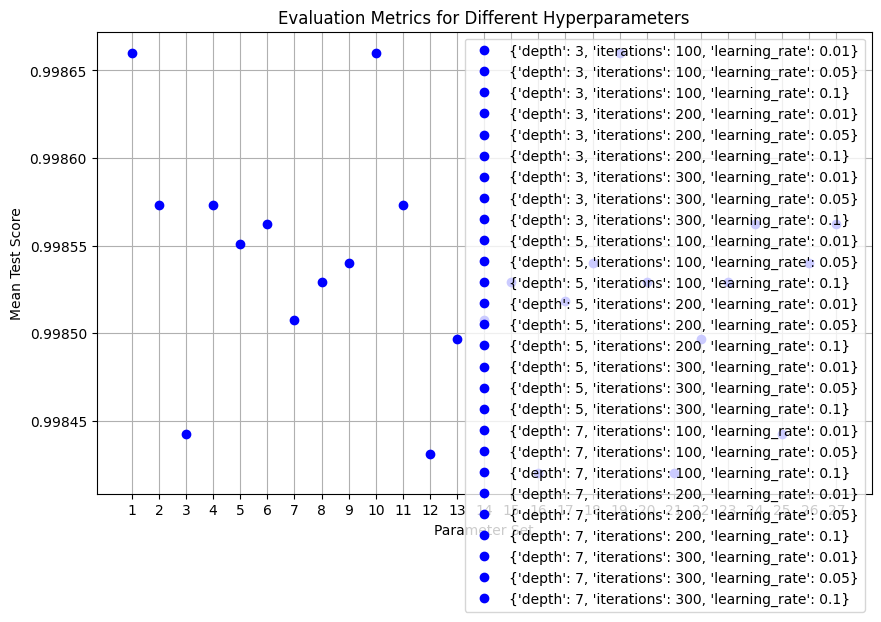

Best parameters: {'depth': 3, 'iterations': 100, 'learning_rate': 0.01}
Training time: 588.50 seconds


In [68]:
import time
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Record the start time
start_time = time.time()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'iterations': [100, 200, 300]
}

# Initialize CatBoostClassifier
catboost_classifier = CatBoostClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Get the results
results = grid_search.cv_results_
mean_test_score = results['mean_test_score']
params = results['params']

# Plot the evaluation metrics
fig, ax = plt.subplots(1, figsize=(10, 6))
for i, param in enumerate(params):
    ax.plot(i, mean_test_score[i], 'bo', label='{}'.format(param))
ax.set_xlabel('Parameter Set')
ax.set_ylabel('Mean Test Score')
ax.set_title('Evaluation Metrics for Different Hyperparameters')
ax.legend()
plt.xticks(range(len(params)), range(1, len(params) + 1))
plt.grid(True)
plt.show()

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)
print("Training time: {:.2f} seconds".format(training_time))


In [69]:
from sklearn.metrics import classification_report

# Make predictions on the test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.00      0.00      0.00        58

    accuracy                           1.00     39343
   macro avg       0.50      0.50      0.50     39343
weighted avg       1.00      1.00      1.00     39343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **11.Conclusion**

Different models from ensemble learning that are implemented above gives us different feature importances in each model.
Similarly the Evaluation Metrices for the models are changed once we performed cross validation technique.
We also found that training time is highest for the ensemble learning models.

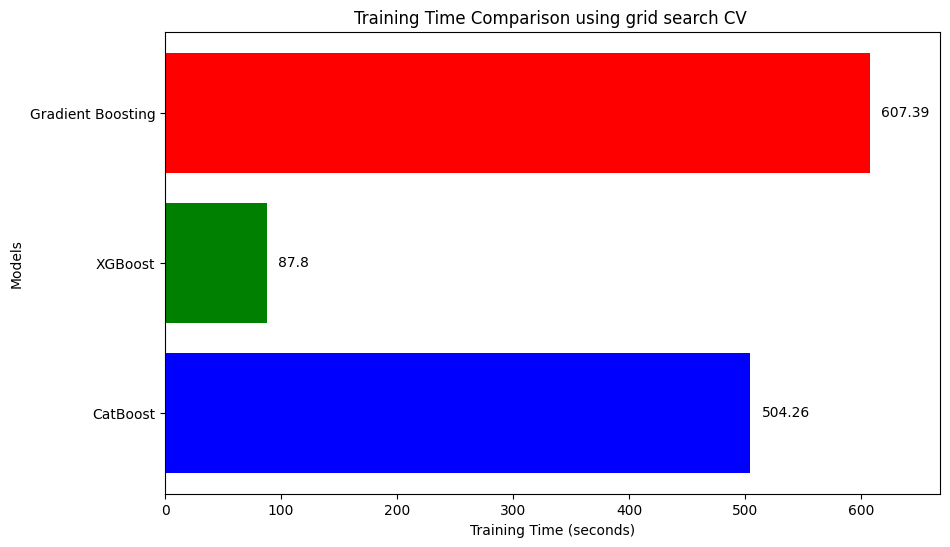

In [70]:
import matplotlib.pyplot as plt

# Models and their parameters
models = ['CatBoost', 'XGBoost', 'Gradient Boosting']
parameters = [{'depth': 3, 'iterations': 100, 'learning_rate': 0.01},
              {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100},
              {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}]

# Training times
training_times = [504.26, 87.80, 607.39]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, training_times, color=['blue', 'green', 'red'])
plt.xlabel('Training Time (seconds)')
plt.ylabel('Models')
plt.title('Training Time Comparison using grid search CV ')
plt.xlim(0, max(training_times) * 1.1)
for i, time in enumerate(training_times):
    plt.text(time + 10, i, str(time), va='center')
plt.show()
